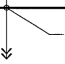

In [1]:
import cv2
from PIL import Image

img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/img_templates/angled-bottom-right.png")

Image.fromarray(img)

0 1887.5


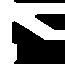

In [2]:
from ocr.line_detector import find_contours
import numpy as np

contours = find_contours(img)

for i, cnt in enumerate(contours):
    print(i, cv2.contourArea(cnt))
    # if cv2.contourArea(cnt) > 500:
    #     cv2.drawContours(img, [cnt], 0, (0, 255, 0), 2)

# print(contours[0], contours[1], contours[2])

# contours = np.vstack([
#     contours[0],
#     contours[1],
#     contours[2],
#     contours[3],
#     # contours[4],
#     # contours[5],
#     # contours[6],
#     # contours[7],
#     # contours[8]
# ])
height, width = img.shape[:2]
mask = np.zeros((height, width), dtype=np.uint8)

for i, cnt in enumerate(contours):
    cv2.drawContours(mask, [cnt], -1, 255, -1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# new_contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(new_contours)
# cv2.drawContours(img, [new_contours], 0, (0, 255, 0), 2)

Image.fromarray(mask)